# Keras Introdution

In [1]:
# Todas as bibliotecas que serão utilizadas

import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from tensorflow.keras.models import load_model
from tensorflow import keras

In [2]:
# Biblioteca que será utilizada 

dataset = keras.datasets.fashion_mnist
((train_x, train_y), (test_x, test_y)) = dataset.load_data()

# Normalizando  os dados 

train_x = train_x/float(250)

# Lista não númerica igualmente indexada dos classificadores do Dataset

y_list_dataset = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

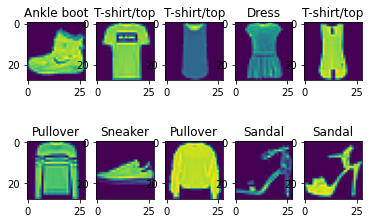

In [3]:
# Visualizando os dados do nosso dataset

for c in range(10):

    plt.subplot(2, 5, c+1)
    plt.imshow(train_x[c])
    plt.title(y_list_dataset[train_y[c]])

In [4]:
# Definindo, compilando, treinando, testando e medindo nosso modelo

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation= tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation= tf.nn.softmax)
    ])

adam = tf.keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-07, amsgrad = False, name = "Adam")

callbacks = [keras.callbacks.EarlyStopping(monitor = 'val_loss'), keras.callbacks.ModelCheckpoint(filepath = 'best_model.hdf5', 
                                                                monitor = 'val_loss', save_best_only = True)]

model.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])

history = model.fit(train_x, train_y, epochs= 10, validation_split = 0.2, batch_size = 500, callbacks = callbacks)

model.predict(test_x)

Epoch 1/10
96/96 [==============================] - 2s 13ms/step - loss: 0.7901 - accuracy: 0.7298 - val_loss: 0.5194 - val_accuracy: 0.8211
Epoch 2/10
96/96 [==============================] - 0s 4ms/step - loss: 0.5077 - accuracy: 0.8243 - val_loss: 0.4497 - val_accuracy: 0.8408


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [5]:
# Gráfico de accuracy do modelo 

fig = go.Figure()
fig.add_trace(go.Scatter(x = history.epoch, y = history.history['accuracy'], name = 'Train'))
fig.add_trace(go.Scatter(x = history.epoch, y = history.history['val_accuracy'], name = 'Validation'))
fig.update_layout(dict(
    title = 'Accuraccy by epoch',
    xaxis_title = 'Epoch',
    yaxis_title = 'Accuracy'
    )) 
fig.show()

In [6]:
# Gráfico de loss do modelo 

fig = go.Figure()
fig.add_trace(go.Scatter(x =  history.epoch, y = history.history['loss'], name = 'Train'))
fig.add_trace(go.Scatter(x = history.epoch, y = history.history['val_loss'], name = 'Validation'))

fig.update_layout(dict(
    title = 'Loss by epoch',
    xaxis_title = 'Epoch',
    yaxis_title = 'Loss'
))
fig.show()

In [7]:
# Verificando o Sumário do nosso modelo 

model_summary = model.summary()

# Obtendo os pesos do nosso modelo 

model_layers_dense01_weights = model.layers[1].get_weights()[0]

# Obtendo os vieses do nosso modelo

model_layers_dense01_bias = model.layers[1].get_weights()[1]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Carregando nosso melhor modelo 

saved_model = load_model('best_model.hdf5')

# Predicting with Keras

In [9]:
# Importando todas as bibliotecas que serão utilizadas

import seaborn as sns
import tensorflow as tf
import pandas as pd
import numpy as np

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Random State

SEED = 52
np.random.seed = SEED

# Cursor

scaler = StandardScaler()

In [10]:
# Importando o database que será utilizado as db

db_raw = pd.read_csv('G:\Meu Drive\My Repositories\datasets_for_data_science\databases\datasets\\airline_passangers.csv')
db_normalized = pd.read_csv('G:\Meu Drive\My Repositories\datasets_for_data_science\databases\datasets\\airline_passangers.csv')

In [11]:
# Normalizando os dados do nosso dataset

scaler.fit(db_raw.values)
db_normalized[['tempo', 'passageiros']] = scaler.transform(db_raw)

# Separando dados de treino e teste

db_x = db_normalized['tempo']
db_y = db_normalized['passageiros']

train_x, test_x, train_y, test_y = train_test_split(db_x, db_y, test_size= 0.2)

train_df = pd.DataFrame(columns = db_raw.columns, data = list(zip(train_x, train_y)))
test_df = pd.DataFrame(columns = db_raw.columns, data = list(zip(test_x, test_y)))
train_df = pd.DataFrame(columns = db_raw.columns, data = scaler.inverse_transform(train_df))
test_df = pd.DataFrame(columns = db_raw.columns, data = scaler.inverse_transform(test_df))

<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

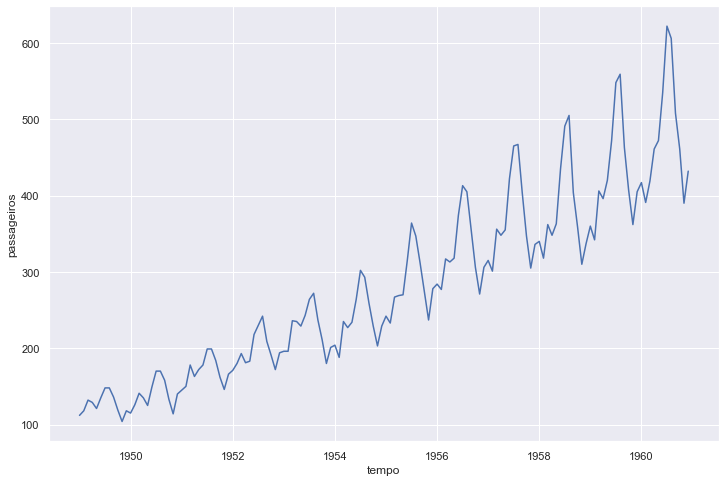

In [12]:
# Visualizando o gráfico do database

sns.set(rc = {'figure.figsize': (12, 8)})
sns.lineplot(x = db_raw['tempo'], y = db_raw['passageiros'], label = '')

<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

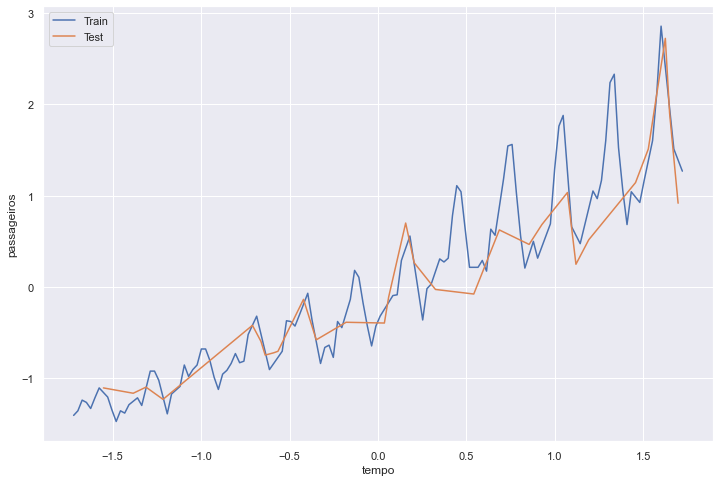

In [13]:
# Visualizando o gráfico de treino e teste do modelo

sns.set(rc = {'figure.figsize': (12, 8)})
#sns.lineplot(x = db_normalized['tempo'], y = db_normalized['passageiros'], label = 'Full')
sns.lineplot(x = train_x, y = train_y, label = 'Train')
sns.lineplot(x = test_x, y = test_y, label = 'Test')

In [14]:
# Definindo, compilando, treinando, testando e medindo nosso modelo linear

model_regressor_01 = keras.Sequential([
    keras.layers.Dense(1, input_dim = 1, kernel_initializer = 'Ones', activation = 'linear', use_bias = False)
])

model_regressor_01.compile(optimizer = 'adam', loss = 'mean_squared_error')

history_01 = model_regressor_01.fit(train_x, train_y, epochs = 10)

predict_01 = model_regressor_01.predict(test_x)

Epoch 1/10
4/4 [==============================] - 0s 998us/step - loss: 0.1465
Epoch 2/10
4/4 [==============================] - 0s 995us/step - loss: 0.1462
Epoch 3/10
4/4 [==============================] - 0s 997us/step - loss: 0.1458
Epoch 4/10
4/4 [==============================] - 0s 665us/step - loss: 0.1456
Epoch 5/10
4/4 [==============================] - 0s 997us/step - loss: 0.1454
Epoch 6/10
4/4 [==============================] - 0s 1ms/step - loss: 0.1452
Epoch 7/10
4/4 [==============================] - 0s 665us/step - loss: 0.1449
Epoch 8/10
4/4 [==============================] - 0s 997us/step - loss: 0.1448
Epoch 9/10
4/4 [==============================] - 0s 1ms/step - loss: 0.1445
Epoch 10/10
4/4 [==============================] - 0s 996us/step - loss: 0.1444


<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

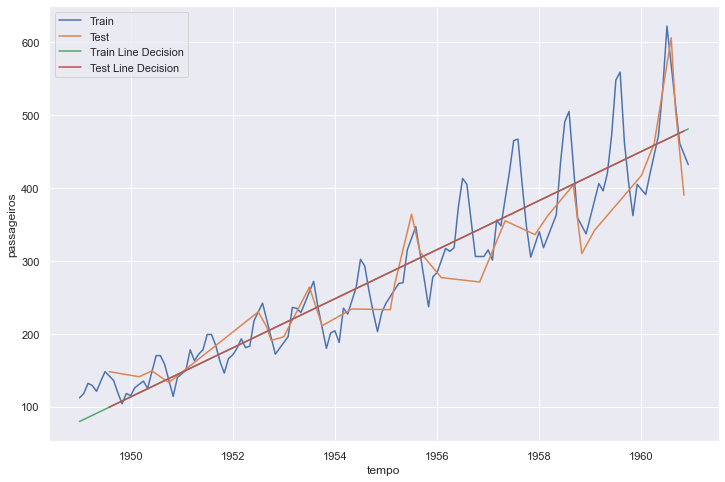

In [15]:
# Printando a linha de decisão do treino e teste do modelo regressor 1

fit_line_decision = model_regressor_01.predict(train_x)[:,0]

fit_line_decision_df_normalized = pd.DataFrame(columns = ['tempo', 'passageiros'], data = list(zip(train_x, fit_line_decision)))
fit_line_decision_df = pd.DataFrame(columns=['tempo', 'passageiros'], data = scaler.inverse_transform(fit_line_decision_df_normalized))

predict_line_decision = predict_01[:,0]
predict_line_decision_df_normalized = pd.DataFrame(columns = db_raw.columns, data = list(zip(test_x, predict_line_decision)))
predict_line_decision_df = pd.DataFrame(columns = db_raw.columns, data = scaler.inverse_transform(predict_line_decision_df_normalized))

sns.set(rc = {'figure.figsize': (12, 8)})
sns.lineplot(x = 'tempo', y = 'passageiros', data = train_df, label = 'Train')
sns.lineplot(x = 'tempo', y = 'passageiros', data = test_df, label = 'Test')
sns.lineplot(x = 'tempo', y = 'passageiros', data = fit_line_decision_df, label = 'Train Line Decision')
sns.lineplot(x = 'tempo', y = 'passageiros', data = predict_line_decision_df, label = 'Test Line Decision')

In [26]:
# Definindo, compilando, treinando, testando e medindo nosso modelo regressor 2

model_regressor_02 = keras.Sequential([
    keras.layers.Dense(8, input_dim = 1, kernel_initializer = 'random_uniform', activation = 'sigmoid', use_bias = False),
    keras.layers.Dense(8, kernel_initializer = 'random_uniform', activation = 'sigmoid', use_bias = False),
    keras.layers.Dense(1, kernel_initializer = 'random_uniform', activation = 'linear', use_bias = False)
])

model_regressor_02.compile(optimizer = 'adam', loss = 'mean_squared_error')

history_02 = model_regressor_02.fit(train_x, train_y, epochs = 1000)

predict_02 = model_regressor_02.predict(test_x)

Epoch 1/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.0210
Epoch 2/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.0201
Epoch 3/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.0201
Epoch 4/1000
4/4 [==============================] - 0s 998us/step - loss: 1.0201
Epoch 5/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.0200
Epoch 6/1000
4/4 [==============================] - 0s 989us/step - loss: 1.0200
Epoch 7/1000
4/4 [==============================] - 0s 998us/step - loss: 1.0200
Epoch 8/1000
4/4 [==============================] - 0s 997us/step - loss: 1.0200
Epoch 9/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.0199
Epoch 10/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0199
Epoch 11/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.0199
Epoch 12/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0198
Epoch 13/1000
4/4 [======================

<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

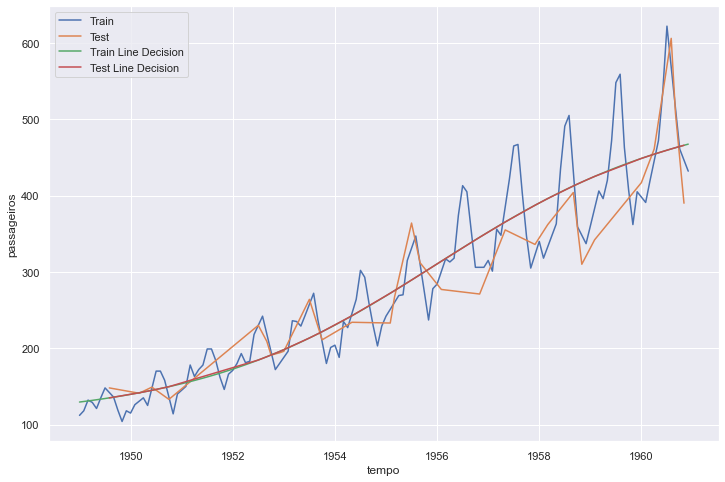

In [27]:
# Printando a linha de decisão do treino e teste do modelo regressor 2

fit_line_decision_02 = model_regressor_02.predict(train_x)[:,0]

fit_line_decision_df_normalized_02 = pd.DataFrame(columns = ['tempo', 'passageiros'], data = list(zip(train_x, fit_line_decision_02)))
fit_line_decision_df_02 = pd.DataFrame(columns=['tempo', 'passageiros'], data = scaler.inverse_transform(fit_line_decision_df_normalized_02))

predict_line_decision_02 = predict_02[:,0]
predict_line_decision_df_normalized_02 = pd.DataFrame(columns = db_raw.columns, data = list(zip(test_x, predict_line_decision_02)))
predict_line_decision_df_02 = pd.DataFrame(columns = db_raw.columns, data = scaler.inverse_transform(predict_line_decision_df_normalized_02))

sns.set(rc = {'figure.figsize': (12, 8)})
sns.lineplot(x = 'tempo', y = 'passageiros', data = train_df, label = 'Train')
sns.lineplot(x = 'tempo', y = 'passageiros', data = test_df, label = 'Test')
sns.lineplot(x = 'tempo', y = 'passageiros', data = fit_line_decision_df_02, label = 'Train Line Decision')
sns.lineplot(x = 'tempo', y = 'passageiros', data = predict_line_decision_df_02, label = 'Test Line Decision')

In [67]:
# Criando um novo método de entrada e saída para o nosso modelo regressor 3

# Normalizando os dados do nosso dataset

db_raw_y = db_raw['passageiros']
db_raw_y.drop([143], axis=0, inplace=True)

db_just_y = pd.DataFrame(columns= ['yx', 'yy'], data = list(zip(db_raw_y[:71], db_raw_y[71:] )))
scaler.fit_transform(db_just_y.values)

# Separando dados de treino e teste

db_x = db_just_y['yx']
db_y = db_just_y['yy']

train_x_01, test_x_01, train_y_01, test_y_01 = train_test_split(db_y, db_y, test_size= 0.2)

train_df_01 = pd.DataFrame(columns = ['yx', 'yy'], data = list(zip(train_x_01, train_y_01)))
test_df_01 = pd.DataFrame(columns = ['yx', 'yy'], data = list(zip(test_x_01, test_y_01)))

In [68]:
# Definindo, compilando, treinando, testando e medindo nosso modelo regressor 2

model_regressor_03 = keras.Sequential([
    keras.layers.Dense(8, input_dim = 1, kernel_initializer = 'random_uniform', activation = 'linear', use_bias = False),
    keras.layers.Dense(64, kernel_initializer = 'random_uniform', activation = 'sigmoid', use_bias = False),
    keras.layers.Dense(8, kernel_initializer = 'random_uniform', activation = 'linear', use_bias = False)
])

model_regressor_03.compile(optimizer = 'adam', loss = 'mean_squared_error')

history_03 = model_regressor_03.fit(train_x_01, train_y_01, epochs = 1000)

predict_03 = model_regressor_03.predict(test_x_01)

Epoch 1/1000
2/2 [==============================] - 0s 1ms/step - loss: 149661.0625
Epoch 2/1000
2/2 [==============================] - 0s 2ms/step - loss: 149602.6562
Epoch 3/1000
2/2 [==============================] - 0s 998us/step - loss: 149542.9219
Epoch 4/1000
2/2 [==============================] - 0s 2ms/step - loss: 149483.7500
Epoch 5/1000
2/2 [==============================] - 0s 997us/step - loss: 149420.6406
Epoch 6/1000
2/2 [==============================] - 0s 2ms/step - loss: 149355.3906
Epoch 7/1000
2/2 [==============================] - 0s 997us/step - loss: 149285.7500
Epoch 8/1000
2/2 [==============================] - 0s 2ms/step - loss: 149210.5469
Epoch 9/1000
2/2 [==============================] - 0s 2ms/step - loss: 149129.5938
Epoch 10/1000
2/2 [==============================] - 0s 3ms/step - loss: 149043.9062
Epoch 11/1000
2/2 [==============================] - 0s 2ms/step - loss: 148952.8594
Epoch 12/1000
2/2 [==============================] - 0s 2ms/step - l

<AxesSubplot:xlabel='yx', ylabel='yy'>

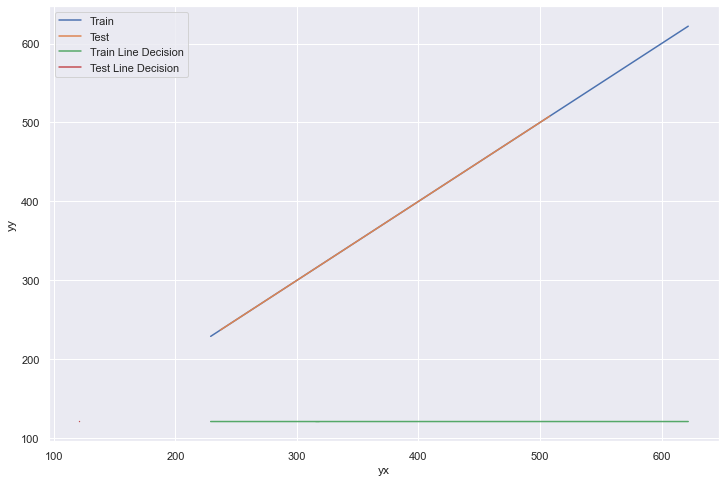

In [73]:
# Printando a linha de decisão do treino e teste do modelo regressor 3

fit_line_decision = model_regressor_03.predict(train_x_01)[:,0]
fit_line_decision_df = pd.DataFrame(columns = ['yx', 'yy'], data = list(zip(train_x_01, fit_line_decision)))

predict_line_decision = predict_03[:,0]
predict_line_decision_df = pd.DataFrame(columns = ['yx', 'yy'], data = list(zip(test_x_01, predict_line_decision)))

sns.set(rc = {'figure.figsize': (12, 8)})
sns.lineplot(x = 'yx', y = 'yy', data = train_df_01, label = 'Train')
sns.lineplot(x = 'yx', y = 'yy', data = test_df_01, label = 'Test')
sns.lineplot(x = 'yx', y = 'yy', data = fit_line_decision_df, label = 'Train Line Decision')
sns.lineplot(x = 'yy', y = 'yy', data = predict_line_decision_df, label = 'Test Line Decision')

# Recurrent Networks

In [89]:
# Importando todas as bibliotecas que serão utilizadas

import seaborn as sns
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Random State

SEED = 52
np.random.seed = SEED

# Cursor

scaler = StandardScaler()

In [90]:
# Importando o dataset que será utilizado as df_raw

df_raw = pd.read_csv('G:\Meu Drive\My Repositories\datasets_for_data_science\databases\datasets\\bikes.csv')

In [94]:
# Alterando os dados do nosso dataset para melhorar modelo 

df_raw['datas'] = pd.to_datetime(df_raw['datas'])

# Separando dados de treino e teste do daset

x = df_raw['datas']
y = df_raw['contagem']

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2)

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

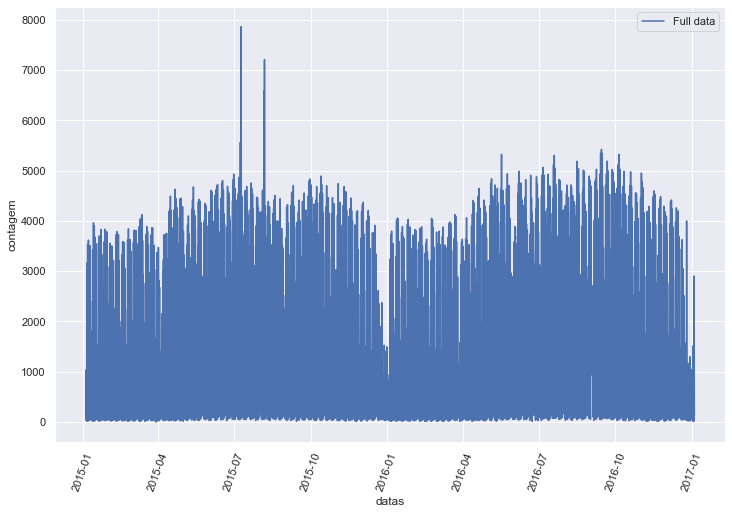

In [93]:
# Visualizando o gráfico do dataset

sns.set( rc = {'figure.figsize': (12,8)})
sns.lineplot(x = 'datas', y = 'contagem', data = df_raw, label = 'Full data')
plt.xticks(rotation = 70)

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

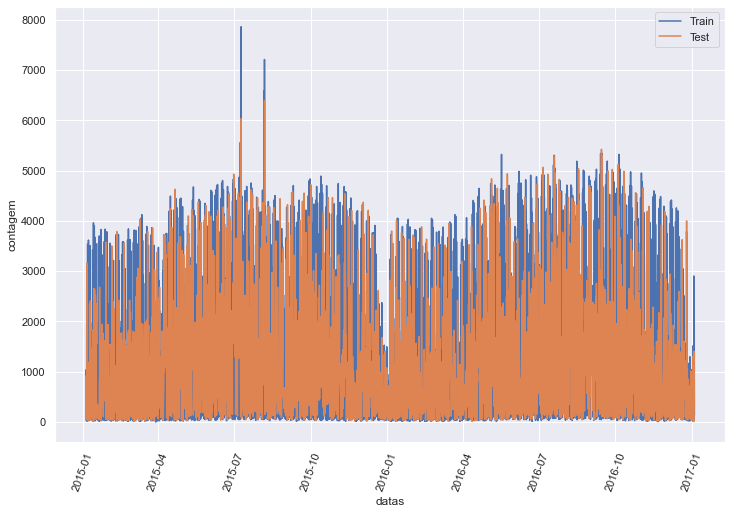

In [103]:
# Visualizando o gráfico de treino e teste do dataset

sns.set( rc = {'figure.figsize': (12,8)})
sns.lineplot(x = train_x, y = train_y, label = 'Train')
sns.lineplot(x = test_x, y = test_y, data = df_raw, label = 'Test')
plt.xticks(rotation = 70)